# Regression

-----------------

## Exercise - Use simple linear regression on the `Auto` data set.

1. Use `statsmodels` or `scikit-learn` to perform a simple linear regression with
`mpg` as the response and `horsepower` as the predictor. Print the results. Comment on the output.
For example:
    - Is there a relationship between the predictor and the response?
    - How strong is the relationship between the predictor and the response?
    - Is the relationship between the predictor and the response positive or negative?
    - What is the predicted `mpg` associated with a `horsepower` of 98? *Optional: What are the associated 95% confidence and prediction intervals?*

2. Plot the response and the predictor. Plot the least squares regression line.

3. Produce [diagnostic plots](http://data.library.virginia.edu/diagnostic-plots/) of the least squares regression fit. Comment on any problems you see with the fit.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#Had been pushing and pulling to Github.  What to do where there's a large data set involved?

1) Use statsmodels or scikit-learn to perform a simple linear regression with mpg as the response and horsepower as the predictor. Print the results. Comment on the output. For example:

In [12]:
auto = pd.read_csv('data/Auto.csv')
auto.head()

results = smf.ols('mpg ~ horsepower', data=auto).fit()
results.summary()

#Prob (F-statistic): 	7.03e-81 Indicates clear relationshio between Miles Per Gallon and Horsepower
#R-squared: 	0.606 Strong relationship between MPG and Horsepower 60% of the variability in MPG is 
# explained by the variabiability in horsepower
#Relationship is NEGATIVE since Coef is negative horsepower 	-0.1578

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           7.03e-81
Time:                        11:08:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
results.params['Intercept'] + results.params['horsepower'] * 98

24.467077152512431

2) Plot the response and the predictor. Plot the least squares regression line.

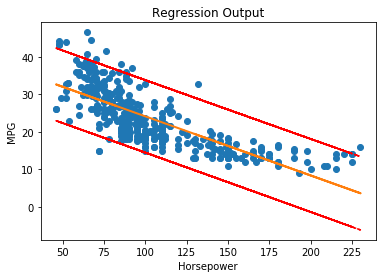

In [17]:
x = auto['horsepower']
y = auto['mpg']

prstd, iv_l, iv_u = wls_prediction_std(results)

plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, results.fittedvalues, '-', lw=2)
plt.plot(x, iv_u, 'r--') #Is this the upper 95% CI?
plt.plot(x, iv_l, 'r--') #Is this the lower 95% CI?
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regression Output')
plt.show()

##Why use Matplotlib and Seaborn for graphing?  Shouldn't they do the same thing?

3) Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

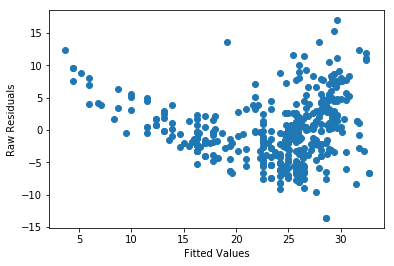

In [21]:
plt.figsize=(12,10)
plt.scatter(results.fittedvalues, results.resid)
plt.ylabel('Raw Residuals')
plt.xlabel('Fitted Values')
plt.show()

# Plot is bowed, so it becomes less accurate at higher values?

/home/uri/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


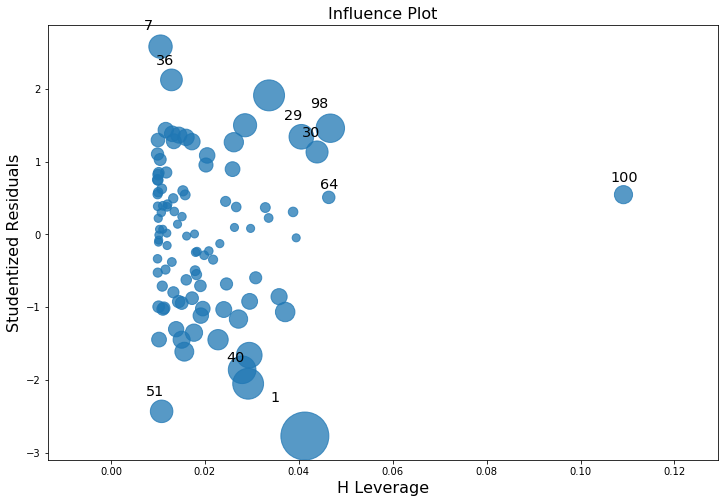

In [35]:
import statsmodels.api as sm

np.warnings.filterwarnings("ignore")
from pandas.core import datetools
np.warnings.resetwarnings()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax)

#Shows residuals and outliers
#There are outliers higher than 2 and lower than -2

##What is H-Leverage?

## Exercise - Use multiple linear regression on the `Auto` data set.

1. Produce a scatterplot matrix which includes all of the variables
in the data set.

2. Compute the matrix of correlations between the variables using
the function corr(). Plot a matrix correlation heatmap as well.

3. Perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Print the results. Comment on the output. For instance:
    - Is there a relationship between the predictors and the response?
    - Which predictors appear to have a statistically significant relationship to the response?
    - What does the coefficient for the year variable suggest?
4. Produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

5. Use the - and + symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?

6. Try a few different transformations of the variables, such as
$log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

1) Produce a scatterplot matrix which includes all of the variables in the data set.

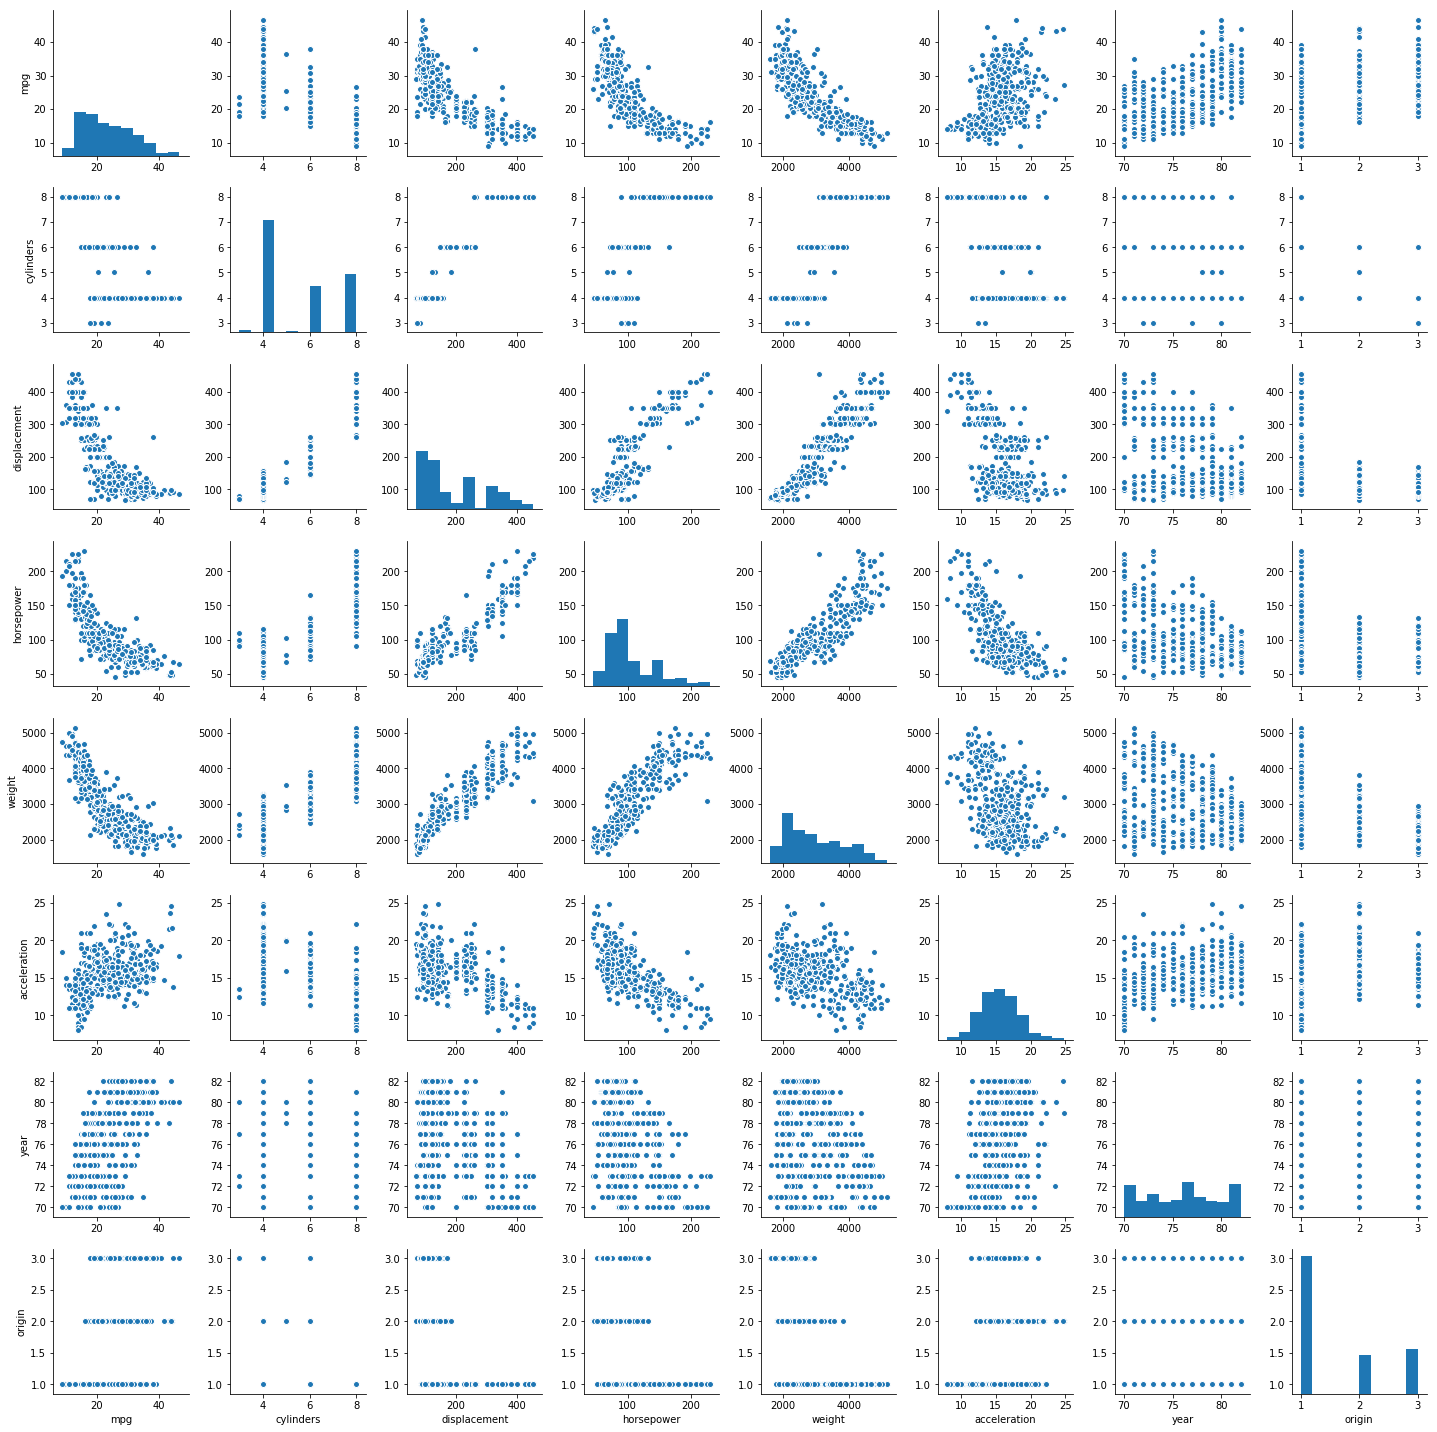

In [24]:
sns.pairplot(auto)

#Neat!!

2) Compute the matrix of correlations between the variables using the function corr(). Plot a matrix correlation heatmap as well.

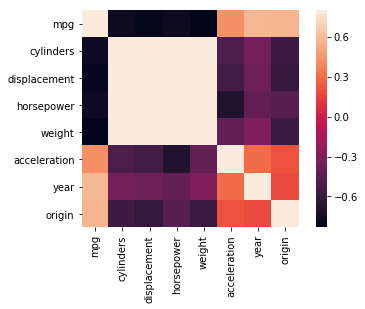

In [26]:
auto.corr()

#Also helpful
#Pandas FYI

acorr = auto.corr()

sns.heatmap(acorr, vmax=0.8, square=True)

3) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Print the results. Comment on the output.

In [28]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [31]:
results = smf.ols(formula, data=auto).fit()
results.summary()

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 08 Aug 2018   Prob (F-statistic):          2.04e-139
Time:                        17:51:09   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

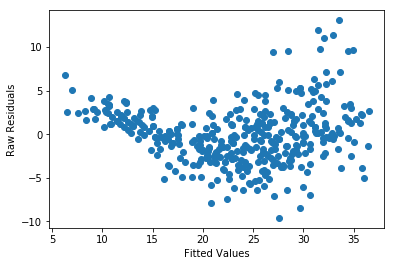

In [32]:
plt.figsize=(12,10)
plt.scatter(results.fittedvalues, results.resid)
plt.ylabel('Raw Residuals')
plt.xlabel('Fitted Values')
plt.show()

5) Use the - and + symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [33]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])

In [34]:
from itertools import combinations

interactions_formula = " + ".join(
    [comb[0]+ " * " + comb[1] for comb in combinations(auto.columns[1:-1],2)])

interactions_formula

'cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [37]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula += ' + ' + interactions_formula

In [38]:
results = smf.ols(formula, data=auto).fit()
results.summary()
#15:00 min in video

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Wed, 08 Aug 2018   Prob (F-statistic):          4.01e-155
Time:                        18:05:43   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

6) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [39]:
results_x = smf.ols('mpg ~ horsepower', data=auto).fit()
results_x.summary()

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           7.03e-81
Time:                        18:08:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
results_log = smf.ols('mpg ~ np.log(horsepower)',data=auto).fit()
results_log.summary()

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           1.70e-95
Time:                        18:11:37   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6997      3.050     35.644      0.000     102.704     114.695
np.log(horsepower)   -18.5822      0.663    -28.034      0.000     -19.885     -17.279
==============================================================================
Omnibus:                       11.919   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.557
Skew:                           0.278   Prob(JB):                     0.000419
Kurtosis:                       3.803   Cond. No.                         64.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
results_sqrt = smf.ols('mpg ~ np.sqrt(horsepower)',data=auto).fit()
results_sqrt.summary()

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           2.02e-89
Time:                        18:25:36   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              58.7052      1.349     43.516      0.000      56.053      61.358
np.sqrt(horsepower)    -3.5035      0.132    -26.544      0.000      -3.763      -3.244
==============================================================================
Omnibus:                       12.446   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.121
Skew:                           0.384   Prob(JB):                      0.00142
Kurtosis:                       3.463   Cond. No.                         59.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
results_sqrd = smf.ols('mpg ~ np.power(horsepower, 2)',data=auto).fit()
results_sqrd.summary()

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     401.7
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           6.23e-62
Time:                        18:25:54   Log-Likelihood:                -1222.4
No. Observations:                 392   AIC:                             2449.
Df Residuals:                     390   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  30.4658      0.447     68.219      0.000      29.588      31.344
np.power(horsepower, 2)    -0.0006   2.83e-05    -20.042      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       25.973   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.455
Skew:                           0.666   Prob(JB):                     4.02e-07
Kurtosis:                       3.177   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'horsepower**2')

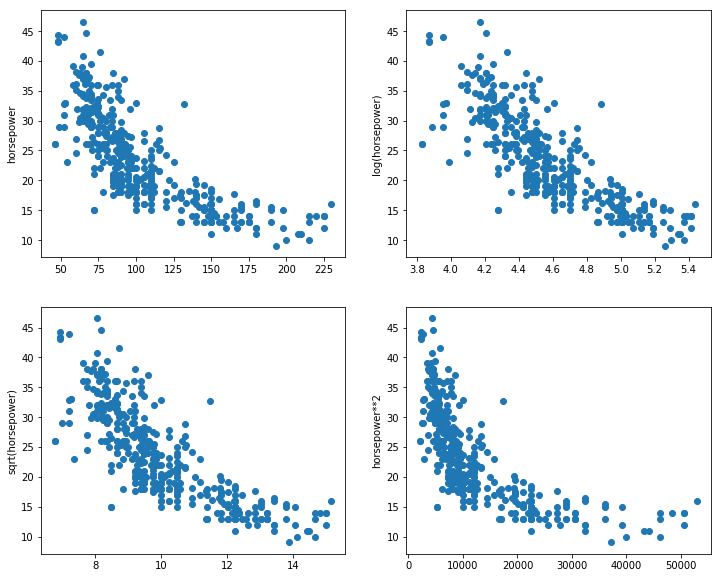

In [46]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax[0,0].scatter(auto['horsepower'], auto['mpg'])
ax[0,0].set_ylabel('horsepower')
ax[0,1].scatter(np.log(auto['horsepower']), auto['mpg'])
ax[0,1].set_ylabel('log(horsepower)')
ax[1,0].scatter(np.sqrt(auto['horsepower']), auto['mpg'])
ax[1,0].set_ylabel('sqrt(horsepower)')
ax[1,1].scatter(np.power(auto['horsepower'], 2), auto['mpg'])
ax[1,1].set_ylabel('horsepower**2')

#Looks like log transformation and sqrt transformation were the best

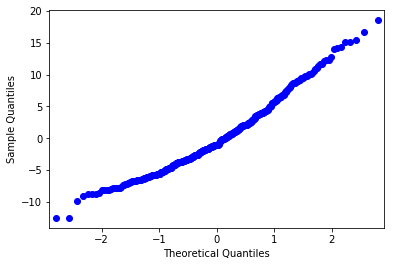

In [51]:
from statsmodels.api import qqplot

qqplot(results_log.resid)
plt.show()

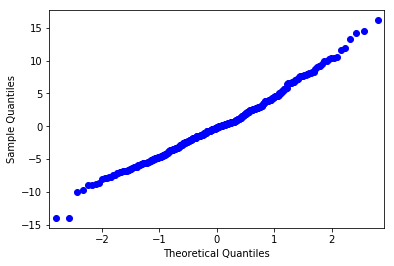

In [52]:
qqplot(results_sqrt.resid)
plt.show()

## Exercise - Use multiple regression using the `Carseats` data set.

1. Fit a multiple regression model to predict `Sales` using `Price`,
`Urban`, and `US`.

2. Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

3. Write out the model in equation form, being careful to handle
the qualitative variables properly.

4. For which of the predictors can you reject the null hypothesis
H: β = 0?

5. On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

6. How well do the models in (1) and (5) fit the data?

7. Using the model from (5), obtain 95% confidence intervals for
the coefficient(s).

8. Is there evidence of outliers or high leverage observations in the
model from (5)?

In [54]:
carseats = pd.read_csv('data/Carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           2.39e-23
Time:                        19:03:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [56]:
results = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()
results.summary()

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           2.39e-23
Time:                        19:04:18   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3) Write out the model in equation form, being careful to handle the qualitative variables properly.

In [59]:
print('Sales = 13.04 + (-0.05044 * Price)...+error')

Sales = 13.04 + (-0.05044 * Price)...+error


4) For which of the predictors can you reject the null hypothesis H: β = 0?

In [60]:
print('Reject for Price and US variables')

Reject for Price and US variables


5) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [61]:
results = smf.ols('Sales ~ Price + US', data=carseats).fit()
results.summary()

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           2.66e-24
Time:                        19:33:57   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6) How well do the models in (1) and (4) fit the data ?

7) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

8) Is there evidence of outliers or high leverage observations in the model from (5) ?

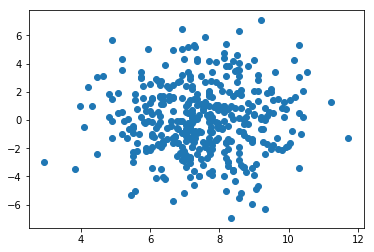

In [62]:
plt.scatter(results.fittedvalues, results.resid)

AttributeError: 'OLSResults' object has no attribute 'astype'

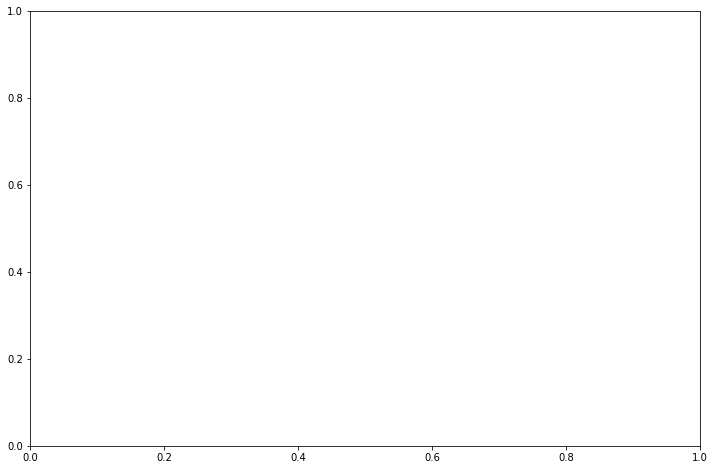

In [64]:
fig, ax = plt.subplots(figsize=(12,8))
#fig = sm.graphics.influence_plot(results, ax=x)
#fig = sm.graphics.influence_plot(results.astype(float), ax=x)

## Exercise - Investigate the t-statistic for the null hypothesis. 

In this problem we will investigate the t-statistic for the null hypothesis
H: β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

    import numpy as np
    np.random.seed(1)
    x = np.random.randn(100)
    y = 2 * x + np.random.randn(100)

1. Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate β, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H: β = 0. Comment on these
results. (You can perform regression without an intercept)

2. Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H: β = 0. Comment on these results.

3. What is the relationship between the results obtained in (1) and
(2)?

4. For the regrssion of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form β^/SE(β^), where β^ is given by (3.38), and where


$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i\hat{\beta})^2}{(n - 1)\sum_{i=1}^nx_i^2}}$$

*Confirm numerically in Python, that the t-statistic can be written as*

$$\frac{\sqrt{n - 1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2) - (\sum_{i=1}^nx_iy_i)}}$$

'5. Using the results from (4), argue that the t-statistic for the regression of y onto x is the same t-statistic for the regression of x onto y.

'6. In Python, show that when regression is performed with an intercept, the t-statistic for H0:β1=0 is the same for the regression of y onto x as it is the regression of x onto y.

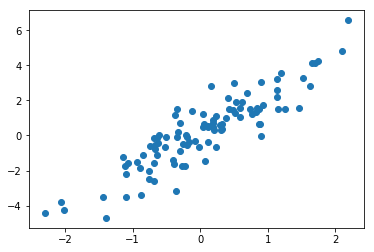

In [65]:
import numpy as np
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)
plt.scatter(x,y)

1) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate β^, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0. Comment on these results.

In [66]:
results = smf.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           3.46e-36
Time:                        19:47:58   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Now perform a simple linear regression of x onto y, without an intercept. Report the coefficient estimate β^, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0. Comment on these results.

In [67]:
results = smf.OLS(x,y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           3.46e-36
Time:                        19:49:31   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3) What is the relationship between the results obtained in (1) and (2)?

In [ ]:
#Both the models reflect similar results

4) For the regrssion of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form β^/SE(β^), where β^ is given by (3.38), and where

$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i\hat{\beta})^2}{(n - 1)\sum_{i=1}^nx_i^2}}$$

Show algebraically, and confirm numerically in Python, that the t-statistic can be written as 

$$\frac{\sqrt{n - 1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2) - (\sum_{i=1}^nx_iy_i)}}$$

We have

$$t = \frac{\sum_ix_iy_y/\sum_jx_j^2}{\sqrt{\sum_i(y_i - x_i\hat{\beta})^2/(n - 1)\sum_jx_j^2}} = \frac{\sqrt{n - 1}\sum_ix_iy_i}{\sqrt{\sum_jx_j^2\sum_i(y_i - x_i\sum_jx_jy_j/\sum_jx_j^2)^2}} = \frac{\sqrt{n - 1}\sum_ix_iy_i}{\sqrt{(\sum_jx_j^2)(\sum_jy_j^2) - (\sum_jx_jy_j)^2}}$$

Now let’s verify this result numerically.

In [68]:
n = len(x)
np.sqrt(n - 1) * np.matmul(x,y) / np.sqrt(np.sum(x**2) * np.sum(y**2) - np.matmul(x, y)**2)

19.791801987091205

5) Using the results from (4), argue that the t-statistic for the regression of y onto x is the same t-statistic for the regression of x onto y.

6) In Python, show that when regression is performed with an intercept, the t-statistic for H0:β1=0 is the same for the regression of y onto x as it is the regression of x onto y.

In [69]:
from statsmodels.tools.tools import add_constant

results = smf.OLS(x, add_constant(y)).fit()
print(results.summary())

results = smf.OLS(y, add_constant(x)).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           5.39e-36
Time:                        20:00:09   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.2

## Exercise - Explore linear regression without an intercept. 

1. Recall that the coefficient estimate β^ for the linear regression of Y onto X witout an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X ?

1. Generate an example in Python with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is different
from the coefficient estimate for the regression of Y onto X.

1. Generate an example in Python with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X.

1) Recall that the coefficient estimate β^ for the linear regression of Y onto X witout an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

The coefficient estimate for the regression of Y onto X is

$$\hat{\beta} = \frac{\sum_ix_iy_i}{\sum_jx_j^2}$$

The coefficient estimate for the regression of X onto Y is

$$\hat{\beta}' = \frac{\sum_ix_iy_i}{\sum_jy_j^2}$$

The coefficients are the same iff $\sum_jx_j^2 = \sum_jy_j^2$

2) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [3]:
np.random.seed(1)
x = np.random.randn(100)
y = x + np.random.randn(100)

In [4]:
np.sum(x**2)

78.71718048502926

In [6]:
np.sum(y**2)

184.71804845827

In [7]:
results = smf.OLS(x,y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           1.49e-17
Time:                        03:43:38   Log-Likelihood:                -93.023
No. Observations:                 100   AIC:                             188.0
Df Residuals:                      99   BIC:                             190.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4716      0.045     10.397      0.000       0.382       0.562
==============================================================================
Omnibus:                        1.184   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.059
Skew:                           0.043   Prob(JB):                        0.589
Kurtosis:                       2.503   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
results.OLS(x,y).fit()
results.summary()

AttributeError: 'OLSResults' object has no attribute 'OLS'

3) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

## Exercise - Explore linear regression with simulated data.

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to set the seed prior to
starting part (1) to ensure consistent results.

1. Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X. 

2. Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

3. Using x and eps, generate a vector y according to the model 

> Y = −1 + 0.5X + e

What is the length of the vector `y`? What are the values of β0 and β1 in this linear model?

4. Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

5. Fit a least squares linear model to predict y using `x`. Comment
on the model obtained. How do β0 and β1 compare to β0 and
β1?

6. Display the least squares line on the scatterplot obtained in (4).
Draw the population regression line on the plot, in a different
color. Create an appropriate legend.

7. Now fit a polynomial regression model that predicts `y` using `x`
and `x^2`. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

8. Repeat (1)–(6) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
`e` in (2). Describe your results.

9. Repeat (1)–(6) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term  in (b). Describe your results.

10. What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

1) Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X. 

In [9]:
x = np.random.randn(100)

2) Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [10]:
eps = np.random.randn(100) * .25

3) Using x and eps, generate a vector y according to the model

    Y = −1 + 0.5X + e

What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [11]:
y = -1 + (.5 * x) + eps

In [12]:
len(y)

100

4) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

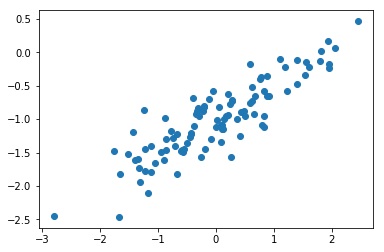

In [13]:
plt.scatter(x,y)

5) Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do β^0 and β^1 compare to β0 and β1?

In [15]:
results = smf.OLS(y, add_constant(x)).fit()
results.summary()

NameError: name 'add_constant' is not defined

6) Display the least squares line on the scatterplot obtained in (4). Draw the population regression line on the plot, in a different color. Use the legend() function to create an appropriate legend.

IndexError: index 1 is out of bounds for axis 0 with size 1

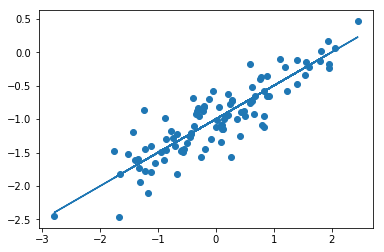

In [16]:
plt.scatter(x,y)
plt.plot(x, -1 + .5 * x, label='Regression')
plt.plot(x, results.params[0] + results.params[1] * x, label='Least Square')
plt.legend()
plt.show()

In [17]:
results.params

array([ 0.47163548])

7) Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit ? Explain your answer.

In [19]:
x2 = column_stack((np.ones(100), x, x**2))
results = smf.OLS(y,x2).fit()
results.summary()

NameError: name 'column_stack' is not defined

8) Repeat (1)-(6) after modifying the data generation process in such a way that there is less noise in the data. The initial model should remain the same. Describe your results.

In [20]:
x = np.random.randn(100)
eps = np.random.randn(100) * .125
y = -1 + .5 * x + eps

results = smf.OLS(y, add_constant(x)).fit()

plt.scatter(x,y)
plt.plot(x, -1 + .5 * x, label='Regression')
plt.plot(x, results.params[0] + results.params[1] * x, label='Least Square')
plt.legend()
plt.show()

NameError: name 'add_constant' is not defined

9) Repeat (1)-(6) after modifying the data generation process in such a way that there is more noise in the data. The initial model should remain the same. Describe your results.

In [21]:
x = np.random.randn(100)
eps = np.random.randn(100) * .5
y = -1 + .5 * x + eps

results = smf.OLS(y, add_constant(x)).fit()

plt.scatter(x,y)
plt.plot(x, -1 + .5 * x, label='Regression')
plt.plot(x, results.params[0] + results.params[1] * x, label='Least Square')
plt.legend()
plt.show()

NameError: name 'add_constant' is not defined

10) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set ? Comment on your results.

## Exercise - Explore the problem of collinearity.

Perform the following commands:

> np.random.seed(8)

> x1 = np.random.rand(100)

> x2 = .5 * x1 + np.random.rand(100) / 10

> y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

1. The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?

2. What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

3. Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are β0, β1, and β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis Ho:β1 = 0? How about the null
hypothesis Ho:β2 = 0?

4. Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
Ho: β1 = 0?

5. Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
Ho: β1 = 0?

6. Do the results obtained in (3)–(5) contradict each other? Explain
your answer.

7. Now suppose we obtain one additional observation, which was unfortunately mismeasured.

> x1=c(x1 , 0.1)

> x2=c(x2 , 0.8)

> y=c(y,6)

Re-fit the linear models from (3) to (5) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

1) The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [23]:
np.random.seed(8)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2*x1 + .3*x2 + np.random.randn(100)


2) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [24]:
np.corrcoef(x1,x2)

array([[ 1.        ,  0.98220892],
       [ 0.98220892,  1.        ]])

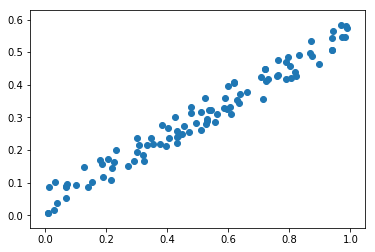

In [25]:
plt.scatter(x1, x2)

3) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are β0, β1, and β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis Ho:β1 = 0? How about the null hypothesis Ho:β2 = 0?

In [26]:
x = np.column_stack((np.ones(100),x1, x2))
results = smf.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     28.39
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           1.97e-10
Time:                        04:37:02   Log-Likelihood:                -141.05
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      97   BIC:                             295.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9615      0.246      7.972      0.000       1.473       2.450
x1             5.9895      1.929      3.106      0.002       2.162       9.817
x2            -6.3538      3.608     -1.761      0.081     -13.514       0.806
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.034
Skew:                          -0.031   Prob(JB):                        0.983
Kurtosis:                       2.936   Cond. No.                         47.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis H0:β1=0 ?

In [28]:
x = np.column_stack((np.ones(100),x1))
results = smf.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     52.54
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           9.79e-11
Time:                        05:18:37   Log-Likelihood:                -142.62
No. Observations:                 100   AIC:                             289.2
Df Residuals:                      98   BIC:                             294.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7327      0.211      8.204      0.000       1.314       2.152
x1             2.6533      0.366      7.249      0.000       1.927       3.380
==============================================================================
Omnibus:                        0.152   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.237
Skew:                          -0.089   Prob(JB):                        0.888
Kurtosis:                       2.841   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis Ho: β1 = 0?

In [29]:
x = np.column_stack((np.ones(100), x2))
results = smf.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     43.31
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           2.32e-09
Time:                        05:19:11   Log-Likelihood:                -145.79
No. Observations:                 100   AIC:                             295.6
Df Residuals:                      98   BIC:                             300.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6721      0.238      7.039      0.000       1.201       2.144
x1             4.6508      0.707      6.581      0.000       3.248       6.053
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.589
Skew:                          -0.125   Prob(JB):                        0.745
Kurtosis:                       2.720   Cond. No.                         7.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6) Do the results obtained in (3)–(5) contradict each other? Explain your answer.

In [ ]:
#The results do not contradict eachother

In [ ]:
#7)

In [31]:
x1_new = np.append(x1, .1)
x2_new = np.append(x2, .8)
y_new = np.append(y, 6)

x = np.column_stack((y_new, x1_new, x2_new))
df_new = pd.DataFrame(x, columns=['y','x1','x2'])
results = smf.ols('y ~ x2', data=df_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     51.05
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           1.55e-10
Time:                        05:25:49   Log-Likelihood:                -146.90
No. Observations:                 101   AIC:                             297.8
Df Residuals:                      99   BIC:                             303.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6407      0.230      7.144      0.000       1.185       2.096
x2             4.7729      0.668      7.145      0.000       3.447       6.098
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.606
Skew:                          -0.141   Prob(JB):                        0.738
Kurtosis:                       2.746   Cond. No.                         7.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

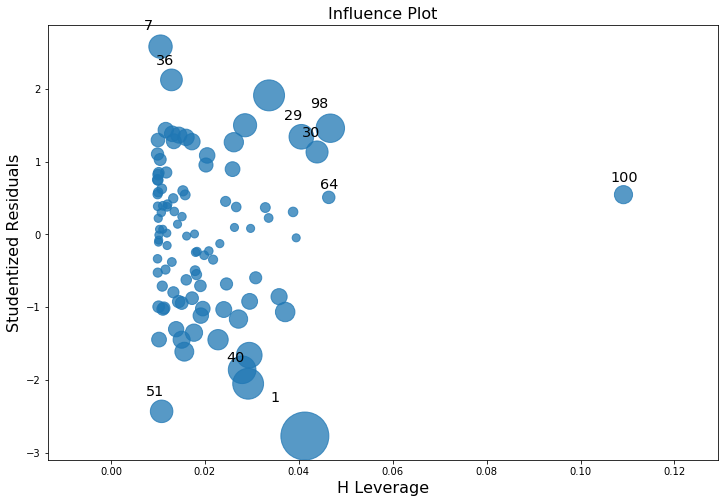

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax)

## Exercise - Predict per capita crime rate. 

This problem involves the `Boston` data set. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

1. For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

2. Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H: β = 0?

2. How do your results from (1) compare to your results from (2)?
Create a plot displaying the univariate regression coefficients
from (1) on the x-axis, and the multiple regression coefficients
from (2) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

3. Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X^2 + β3X^3 + E.

In [41]:
boston = pd.read_csv('data/Boston.csv').iloc[:, 1:]
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


1) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [42]:
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    print(results.summary())

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           5.51e-06
Time:                        05:33:58   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           2.69e-56
Time:                        05:33:58   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.0

2) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H: β = 0?

In [43]:
formula = 'crim ~ ' + ' + '.join(boston.columns[1:])
formula

'crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv'

In [45]:
results = smf.ols(formula, data=boston).fit()
results.summary()

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           1.57e-56
Time:                        05:40:09   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3) How do your results from (1) compare to your results from (2)? Create a plot displaying the univariate regression coefficients from (1) on the x-axis, and the multiple regression coefficients from (2) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [51]:
multiple_linear_params = results.params.iloc[1:]

simple_linear_params = pd.Series()

for col in boston.columns[1:]:
    results_slr = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    simple_linear_params = simple_linear_params.append(results_slr.params.loc[[col]])
                                                       
both_models = pd.DataFrame({'simple': simple_linear_params, 'multiple': multiple_linear_params})
both_models

/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/home/uri/anaconda3/lib/python3.6/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


,multiple,simple
zn,0.044855,-0.073935
indus,-0.063855,0.509776
chas,-0.749134,-1.892777
nox,-10.313535,31.248531
rm,0.430131,-2.684051
age,0.001452,0.107786
dis,-0.987176,-1.550902
rad,0.588209,0.617911
tax,-0.003780,0.029742
ptratio,-0.271081,1.151983


In [ ]:
boston.corr()

# Age although obviously this is correlation not a direct link

4) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form $Y = β0 + β1X + β2X^2 + β3X^3 + E$.

In [52]:
for col in boston.columns[1:]:
    results = smf.ols()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


5) Try out some of the regression methods explored in this topic, such as best subset selection, forward stepwise and backward stepwise. Present and discuss results for the approaches that you consider. Make sure that you are evaluating model performance using validation set error, cross-validation, or some other reasonable alternative, as opposed to using training error. Does your chosen model involve all of the features in the data set ? Why or why not ?